# apply_padded

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.filters.apply_padded))

---
 ## Documentation for ``apply_padded``
 ---
**<span style="color:purple">apply&#95;padded</span>_(im, pad_width, func, pad_val=1, **kwargs)_**


Applies padding to an image before sending to ``func``, then extracts
the result corresponding to the original image shape.


#### Parameters
* im : <b><i>ndarray</i></b>  The image to which ``func`` should be applied
* pad_width : <b><i>int or list of ints</i></b>  The amount of padding to apply to each axis. Refer to
	``numpy.pad`` documentation for more details.
* pad_val : <b><i>scalar</i></b>  The value to place into the padded voxels.  The default is 1 (or
	``True``) which extends the pore space.
* func : <b><i>function handle</i></b>  The function to apply to the padded image.
* kwargs :  Additional keyword arguments are collected and passed to ``func``.

#### Notes
A use case for this is when using ``skimage.morphology.skeletonize_3d``
to ensure that the skeleton extends beyond the edges of the image.
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

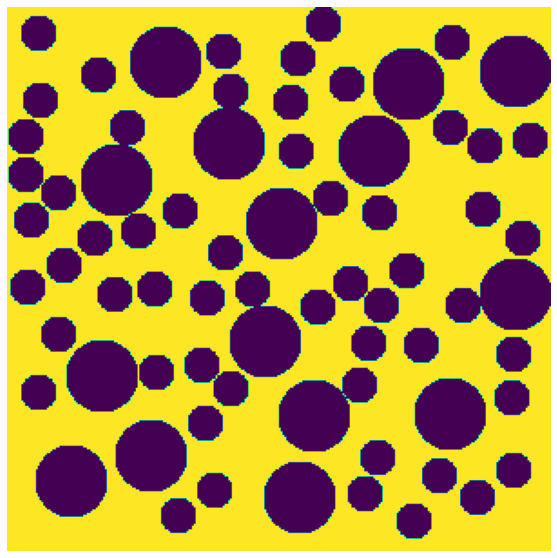

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=20, volume_fraction=0.2)
im = ps.generators.RSA(im, radius=10, volume_fraction=0.4)
im = im == 0
pad_width = 1
func = skimage.morphology.skeletonize_3d

#default values
pad_val=1

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

## Apply filter function:
With different parameters

### pad_width

Text(0.5, 1.0, 'pad_width = 100')

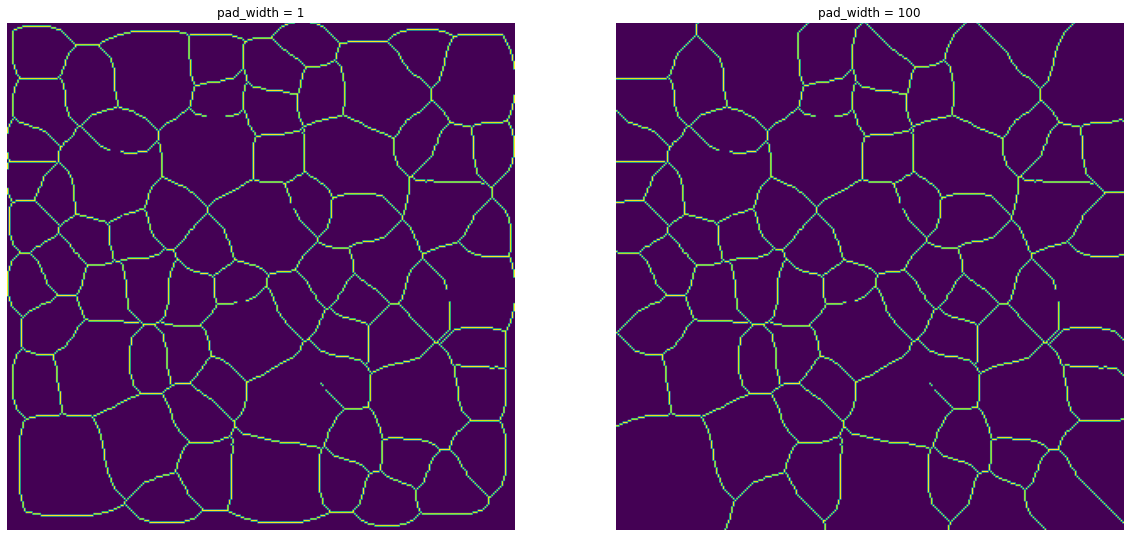

In [4]:
x = ps.filters.apply_padded(im=im, pad_width=pad_width, func=func, pad_val=pad_val)
xx = ps.filters.apply_padded(im=im, pad_width=100, func=func, pad_val=pad_val)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('pad_width = 1')
ax[1].set_title('pad_width = 100')

### func

Text(0.5, 1.0, 'func = binary_dilation')

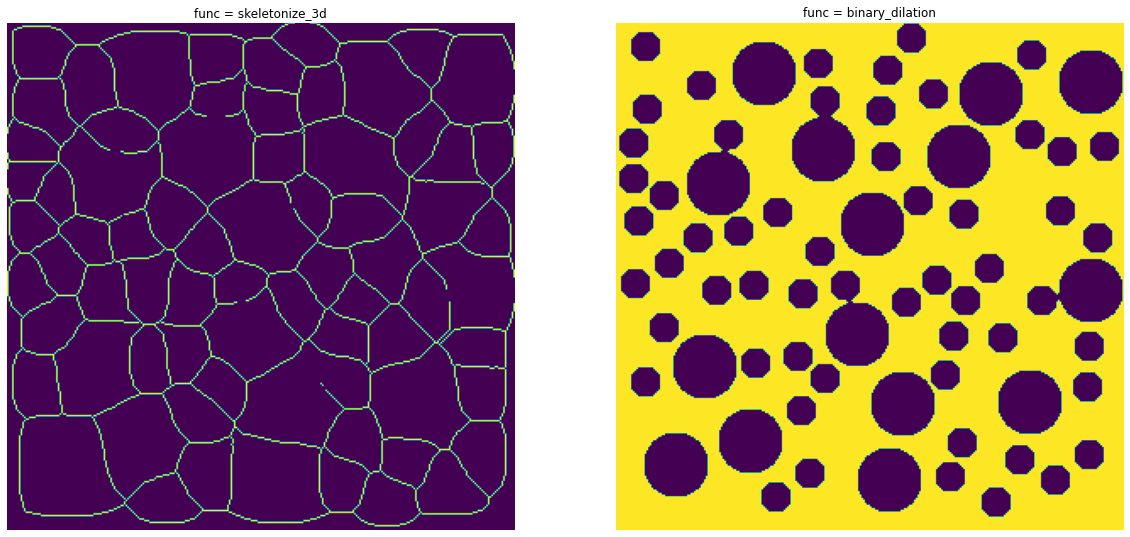

In [5]:
f2 = skimage.morphology.binary_dilation
xx = ps.filters.apply_padded(im=im, pad_width=pad_width, func=f2, pad_val=pad_val)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('func = skeletonize_3d')
ax[1].set_title('func = binary_dilation')

### pad_val

Text(0.5, 1.0, 'pad_val = 10')

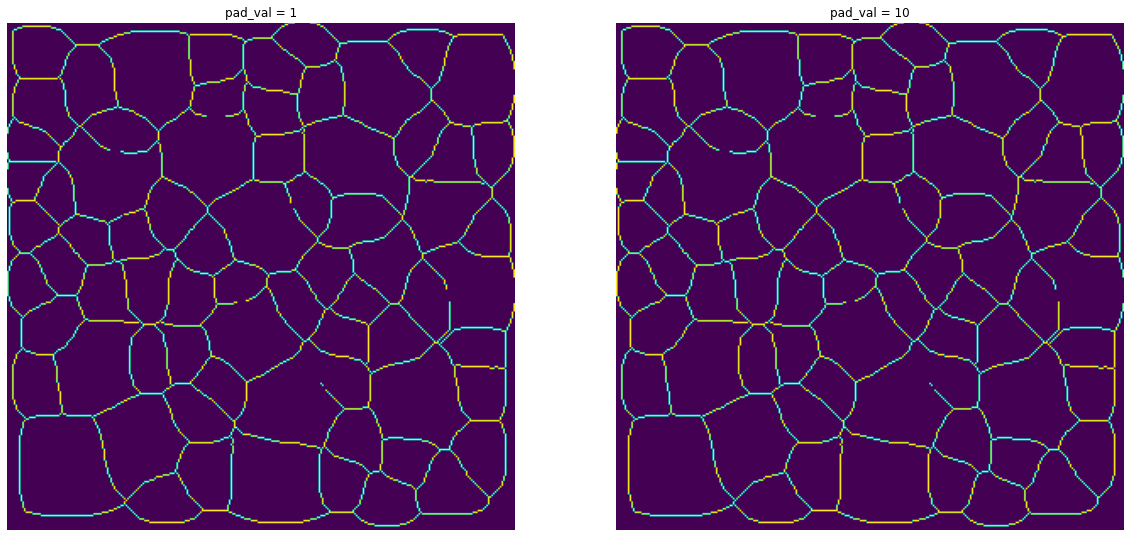

In [6]:
xx = ps.filters.apply_padded(im=im, pad_width=pad_width, func=func, pad_val=10)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('pad_val = 1')
ax[1].set_title('pad_val = 10')